Loading Data

In [20]:
import pandas as pd 

data = pd.read_csv('StudentsPerformance.csv')

Basic Data Findings

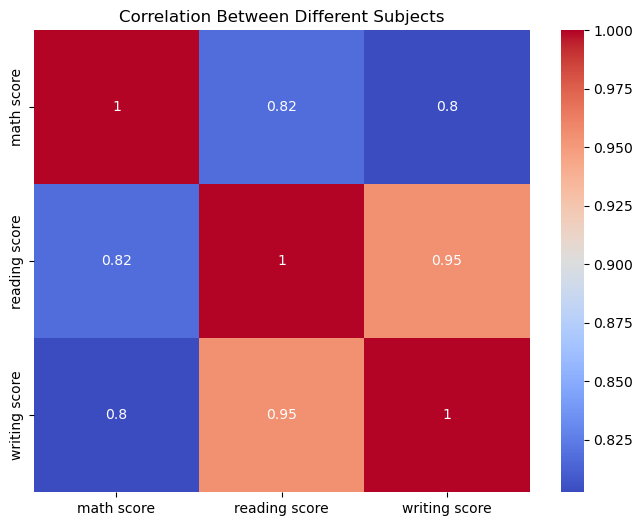

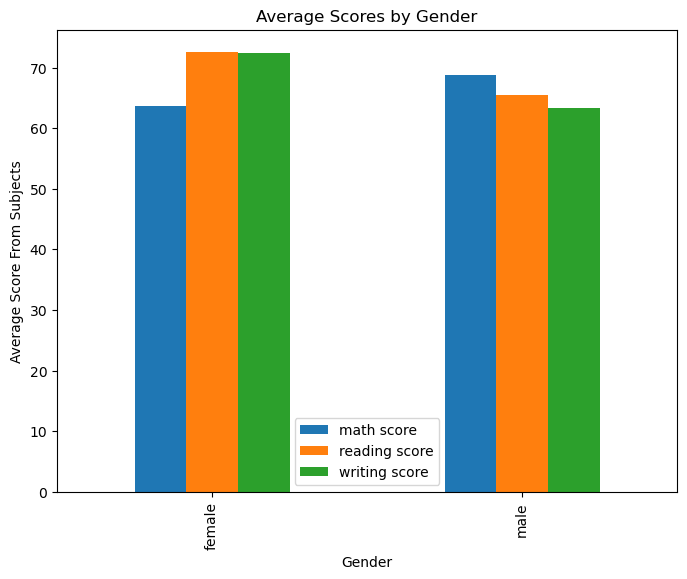

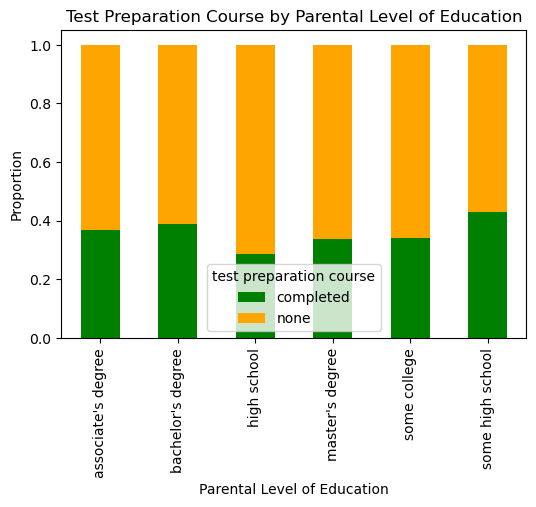

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6)) 
correlation_subjects = data[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(correlation_subjects, annot=True, cmap='coolwarm')
plt.title('Correlation Between Different Subjects')
plt.show()

gender_scores_average = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_scores_average.plot(kind='bar', figsize=(8, 6))
plt.title('Average Scores by Gender')
plt.ylabel('Average Score From Subjects')
plt.xlabel('Gender')
plt.show()

parental_education_preparation = data.groupby('parental level of education')['test preparation course'].value_counts(normalize=True).unstack()
parental_education_preparation.plot(stacked=True, kind='bar', figsize=(6, 4), color=['green', 'orange'])
plt.title('Test Preparation Course by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Proportion')
plt.show()


Data Preprocessing

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['gender'] = label_encoder.fit_transform(data['gender'])

data = pd.get_dummies(data, columns=['race/ethnicity'], drop_first=True)
data = pd.get_dummies(data, columns=['parental level of education'], drop_first=True)

data['lunch'] = data['lunch'].map({'standard': 1, 'free/reduced': 0})

data['test preparation course'] = data['test preparation course'].map({'none': 0, 'completed': 1})

data['gender_prep'] = data['gender'] * data['test preparation course']

print(data.head())


   gender  lunch  test preparation course  math score  reading score  \
0       0      1                        0          72             72   
1       0      1                        1          69             90   
2       0      1                        0          90             95   
3       1      0                        0          47             57   
4       1      1                        0          76             78   

   writing score  race/ethnicity_group B  race/ethnicity_group C  \
0             74                    True                   False   
1             88                   False                    True   
2             93                    True                   False   
3             44                   False                   False   
4             75                   False                    True   

   race/ethnicity_group D  race/ethnicity_group E  \
0                   False                   False   
1                   False                   False   

Logistic Regression

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       125
           1       0.60      0.41      0.49        75

    accuracy                           0.68       200
   macro avg       0.65      0.62      0.63       200
weighted avg       0.66      0.68      0.66       200



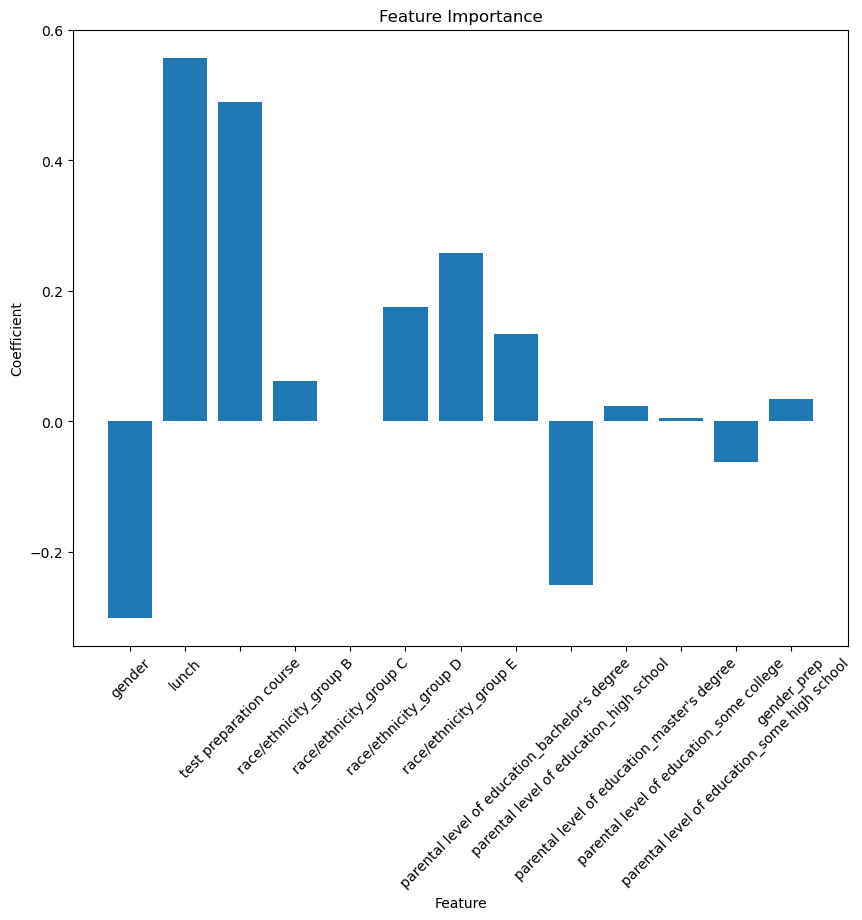

   Predicted Label  Actual Label
0                0             1
1                0             0
2                0             1
3                0             1
4                1             1


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

data['average_of_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)
data['above_C'] = 0
data.loc[data['average_of_score'] >= 73, 'above_C'] = 1
 
X = data.drop(['average_of_score', 'above_C', 'math score', 'reading score', 'writing score'], axis=1)
y = data['above_C']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

y_pred = logistic_regression.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

features = X.columns
coef = logistic_regression.coef_[0]

plt.figure(figsize=(10, 8))
plt.bar(features, coef)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

df_for_predictions = pd.DataFrame({
    'Predicted Label': y_pred,
    'Actual Label': y_test.values
})

print(df_for_predictions.head())

Decision Tree

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       125
           1       0.56      0.39      0.46        75

    accuracy                           0.66       200
   macro avg       0.62      0.60      0.60       200
weighted avg       0.64      0.66      0.64       200



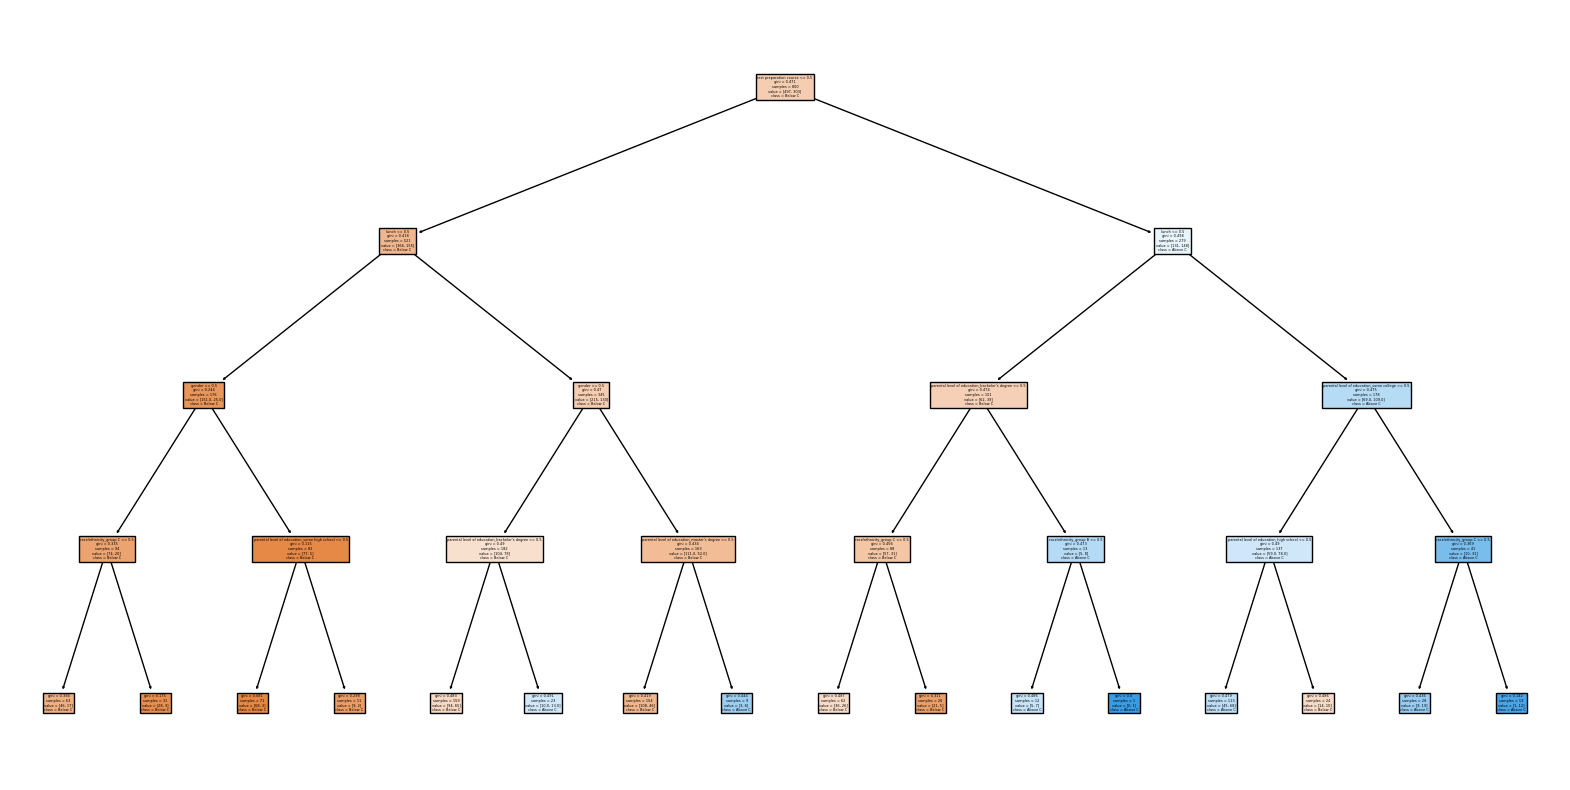

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)  
decision_tree.fit(X_train, y_train)

prediction = decision_tree.predict(X_test)

print(classification_report(y_test, prediction))

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Below C', 'Above C'])
plt.show()

KMeans

c:\Users\rauna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


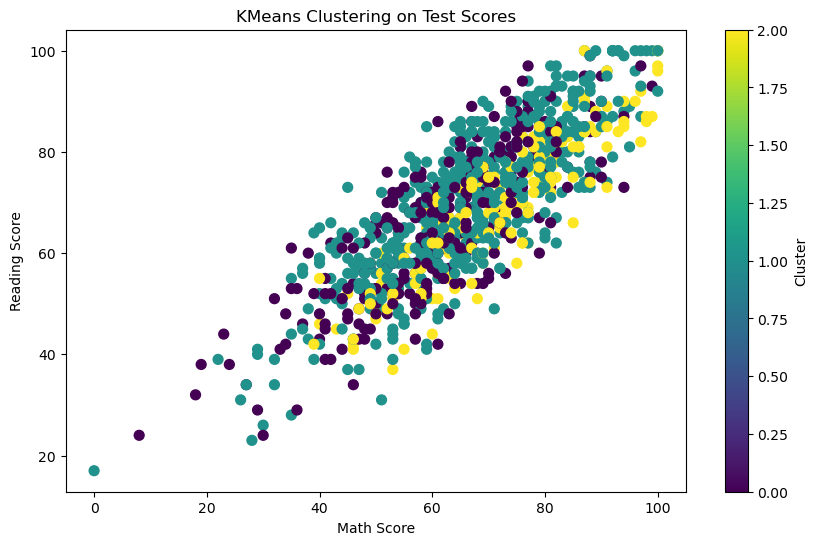

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

subjects = data[['math score', 'reading score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
data['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(data['math score'], data['reading score'], c=data['Cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering on Test Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.colorbar(label='Cluster')
plt.show()
